<h4 align="center"> G8_Project Proposal_IST5520</h4>

<h1 align="center"> Missouri Traffic Accident Data</h1>
<h2 align="center"> Descriptive & Predictive Analysis on different factors influencing road accidents </h2>
<h3 align="center"> Group Members: Dennis Baleta, Sai Rachana Bandi, Austin Kovis, Debasis Roy, Apurv Saxena </h3>

## 1. Introduction:
US-Accidents can be used for numerous applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and extracting cause and effect rules to predict accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. This data has been collected in real-time, using multiple Traffic APIs. Currently, it contains data that is collected from February 2016 to December 2019 for the Contiguous United States.

This is a countrywide traffic accident dataset, which covers 49 states of the United States from which we are taking 3 states into consideration. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.0 million accident records in this dataset.

Most of the accidents take place due to bad weather conditions (like heavy fog, rain, sleet, wind), traffic, because of drivers mood variations and so on.

Our study will focus on Weather_Condition factor, Temperature factor, Visibility factor, Wind_Speed factor, Wind_Direction factor and all other weather related factors. Also Severity factor, factors related to the place where the accident has occurred. Using this data we will create a model which would predict the list of accident prone areas for the next day based on the weather conditions, which would help the department of transportation and police to take necessary precautions to avoid accidents from occuring or to take immediate action if required.

In this project, we want to conduct an exploratory study on the road accidents and factors inﬂuencing it. Speciﬁcally, we want to answer the following research questions:
1. What are the predicting variables actually aﬀecting the road accidents?
2. How does weather conditions impact road accidents?
3. What are factors of the accident and how it could be mapped with severity?


## 2. Data

### 2.1. Data extraction
The dataset is collected from the below link

https://www.kaggle.com/sobhanmoosavi/us-accidents

The dataset will be filtered to contain the data of three states. This is due to the size of the original dataset being too large to feasibly manipulate. The three states the new dataset will be based on will be Missouri (MO), California (CA), and Maryland (MD). This will pull data from the west coast, midwest, and the east coast of the United States.

We then preceded to determine what variables included NULL values and how many NULL values there are so that we could remove them to further clean the data. We also determined what columns were necessary to  answer our research questions and removed any columns we deemed unnecessary.

In [142]:
# Import Modules
import pandas as pd

# Read in the data
dat = pd.read_csv("MO_Accidents.csv")

# Shows us the data types of each variable included within the study.
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     7666 non-null   object 
 1   Source                 7666 non-null   object 
 2   TMC                    7666 non-null   int64  
 3   Severity               7666 non-null   int64  
 4   Start_Time             7666 non-null   object 
 5   End_Time               7666 non-null   object 
 6   Start_Lat              7666 non-null   float64
 7   Start_Lng              7666 non-null   float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           7666 non-null   float64
 11  Description            7666 non-null   object 
 12  Number                 1088 non-null   float64
 13  Street                 7666 non-null   object 
 14  Side                   7666 non-null   object 
 15  City

In [143]:
#Visualizes the data in a readable format
dat.head(1).transpose()

,0
ID,A-167306
Source,MapQuest
TMC,201
Severity,3
Start_Time,11/30/2016 17:32
End_Time,11/30/2016 18:02
Start_Lat,38.65
Start_Lng,-90.4486
End_Lat,NaN
End_Lng,NaN


### Key Information in The Dataset


SlNo. Attribute: Description
1. ID: This is a unique identifier of the accident record.
2. Source: Indicates source of the accident report (i.e. the API which reported the accident.).
3. TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides a more detailed description of the event.
4. Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
5. Start_Time: Shows start time of the accident in the local time zone.
6. End_Time: Shows end time of the accident in the local time zone.
7. Start_Lat: Shows latitude in GPS coordinate of the start point.
8. Start_Lng: Shows longitude in GPS coordinate of the start point.
9. End_Lat: Shows latitude in GPS coordinate of the end point.
10. End_Lng: Shows longitude in GPS coordinate of the end point.
11. Distance(mi): The length of the road extent affected by the accident.
12. Description: Shows natural language description of the accident.
13. Number: Shows the street number in the address field.
14. Street: Shows the street name in the address field.
15. Side: Shows the relative side of the street (Right/Left) in the address field.
16. City: Shows the city in the address field.
17. County: Shows the county in the address field.
18. State: Shows the state in the address field.
19. Zip Code: Shows the zip code in the address field.
20. Country: Shows the country in the address field.
21. Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).
22. Airport_Code: Denotes an airport-based weather station which is the closest one to the location of the accident.
23. Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).
24. Temperature(F): Shows the temperature (in Fahrenheit).
25. Wind_Chill(F): Shows the wind chill (in Fahrenheit).
26. Humidity(%): Shows the humidity (in percentage).
27. Pressure(in): Shows the air pressure (in inches).
28. Visibility(mi): Shows visibility (in miles).
29. Wind_Direction: Shows wind direction.
30. Wind_Speed(mph): Shows wind speed (in miles per hour).
31. Precipitation(in): Shows precipitation amount in inches, if there is any.
32. Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
33. Amenity: A POI annotation which indicates the presence of amenity in a nearby location.
34. Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.
35. Crossing: A POI annotation which indicates the presence of crossing in a nearby location.
36. Give_Way: A POI annotation which indicates the presence of a give_way in a nearby location.
37. Junction: A POI annotation which indicates the presence of a junction in a nearby location.
38. No_Exit: A POI annotation which indicates the presence of no_exit in a nearby location.
39. Railway: A POI annotation which indicates the presence of railway in a nearby location.
40. Roundabout: A POI annotation which indicates the presence of roundabout in a nearby location.
41. Station: A POI annotation which indicates the presence of a station in a nearby location.
42. Stop: A POI annotation which indicates the presence of a stop in a nearby location.
43. Traffic_Calming: A POI annotation which indicates the presence of traffic_calming in a nearby location.
44. Traffic_Signal: A POI annotation which indicates the presence of traffic_signal in a nearby location.
45. Turning_Loop: A POI annotation which indicates the presence of a turning_loop in a nearby location.
46. Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.
47. Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.
48. Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.
49. Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.



### 2.2. Clean the Data


In [144]:
# Apply() allows us to see what variables include NULL values and how many NULL values are there.
dat.apply(lambda x: sum(x.isnull()), axis=0)

ID                          0
Source                      0
TMC                         0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  7666
End_Lng                  7666
Distance(mi)                0
Description                 0
Number                   6578
Street                      0
Side                        0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                1
Weather_Timestamp          54
Temperature(F)             66
Wind_Chill(F)            1748
Humidity(%)                69
Pressure(in)               66
Visibility(mi)             71
Wind_Direction             89
Wind_Speed(mph)           277
Precipitation(in)        1855
Weather_Condition          72
Amenity                     0
Bump      

In [145]:
#Summary of the statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMC,7666.0,209.557396,25.158507,201.000000,201.000000,201.000000,201.000000,406.000000
Severity,7666.0,2.711584,0.483425,1.000000,2.000000,3.000000,3.000000,4.000000
Start_Lat,7666.0,38.646983,0.429148,36.089977,38.562069,38.672737,38.803123,40.466331
Start_Lng,7666.0,-91.483290,1.744734,-95.480331,-93.277824,-90.449280,-90.339684,-89.533127
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),7666.0,0.114018,0.648372,0.000000,0.000000,0.000000,0.000000,13.820000
Number,1088.0,4497.553309,4097.305301,1.000000,1236.000000,3300.000000,6402.750000,24499.000000
Temperature(F),7600.0,61.061039,19.066254,-0.900000,48.000000,64.000000,76.000000,102.900000
Wind_Chill(F),5918.0,57.080331,22.544401,-13.800000,39.000000,62.000000,75.000000,96.000000


We see that 'End_Lat' and 'End_Lng' columns are empty. Thus removing these columns is better as they are of no use.

In [146]:
dat = dat.drop(['End_Lat', 'End_Lng'], axis=1)

As we are doing analysis on only Missouri state data some columns like Timezone, Country and State will have same values. Thus removing these columns is better as they are of no use. 

In [147]:
dat = dat.drop(['Timezone', 'Country','State', 'Number', 'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 'Roundabout', 'Bump', 'Weather_Timestamp', 'Airport_Code'], axis=1)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7666 non-null   object 
 1   Source             7666 non-null   object 
 2   TMC                7666 non-null   int64  
 3   Severity           7666 non-null   int64  
 4   Start_Time         7666 non-null   object 
 5   End_Time           7666 non-null   object 
 6   Start_Lat          7666 non-null   float64
 7   Start_Lng          7666 non-null   float64
 8   Distance(mi)       7666 non-null   float64
 9   Description        7666 non-null   object 
 10  Street             7666 non-null   object 
 11  Side               7666 non-null   object 
 12  City               7666 non-null   object 
 13  County             7666 non-null   object 
 14  Zipcode            7666 non-null   object 
 15  Temperature(F)     7600 non-null   float64
 16  Wind_Chill(F)      5918 

In [156]:
# removing null values
dat =dat.dropna(axis=0)
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 20 to 7664
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 5420 non-null   object        
 1   Source             5420 non-null   object        
 2   TMC                5420 non-null   int64         
 3   Severity           5420 non-null   int64         
 4   Start_Time         5420 non-null   datetime64[ns]
 5   End_Time           5420 non-null   datetime64[ns]
 6   Start_Lat          5420 non-null   float64       
 7   Start_Lng          5420 non-null   float64       
 8   Distance(mi)       5420 non-null   float64       
 9   Description        5420 non-null   object        
 10  Street             5420 non-null   object        
 11  Side               5420 non-null   object        
 12  City               5420 non-null   object        
 13  County             5420 non-null   object        
 14  Zipcode

## 3. Data Exploration

### 3.1. Data Transformation

We notice that the Start_Time and End_Time columns are represented as strings. It's better to represent them as datetime objects. Let's transform them by calling the to_datetime() function in the pandas module.

In [148]:
dat['Start_Time'] = pd.to_datetime(dat['Start_Time'])
dat['End_Time'] = pd.to_datetime(dat['End_Time'])

In [149]:
# Describe the Start_Time column
dat['Start_Time'].describe()

count                    7666
unique                   7503
top       2019-12-16 05:30:00
freq                        3
first     2016-06-21 10:32:00
last      2019-12-31 21:41:00
Name: Start_Time, dtype: object

In [150]:
# Describe the End_Time column
dat['End_Time'].describe()

count                    7666
unique                   7383
top       2019-04-30 19:22:00
freq                        6
first     2016-06-21 11:17:00
last      2019-12-31 22:56:00
Name: End_Time, dtype: object

In many cases, we may need to know the year, month, day of week, hour information of the accident. These columns may be helpful in visualizing the data as well as regression or predicitive analyses. Let's create seperate variables.

In [151]:
# Create Start_Year column
dat['Start_Year'] = dat['Start_Time'].dt.year
# Create Start_Month column
dat['Start_Month'] = dat['Start_Time'].dt.month
# Create Start_Dayofweek column (0=Mon, 6=Sun)
dat['Start_Dayofweek'] = dat['Start_Time'].dt.dayofweek
# Create Start_Hour column
dat['Start_Hour']= dat['Start_Time'].dt.hour

We noticed that there are few columns with boolean values which can be replaced with 1 and 0

In [152]:
# Replace Boolean values with numbers
dat.replace([True, False], [1, 0], inplace=True)

In [153]:
dat['Amenity'].unique()

array([0, 1], dtype=int64)

As extreme weather conditions like for, rain, snow effect number of accidents because they create trouble to the driver in visibility of road and slippery roads we should create dummies for Weather_Condition and take only required extreme condions. These columns may be helpful in knowing the relationship between severity and extreme weather conditions.

Let's create dummies and append them to our dataset.

In [158]:
# creating dummies for Weather_Conditions
dummy = pd.get_dummies(dat['Weather_Condition'])

In [163]:
#dat.reset_index(drop=True, inplace=True)
#dummy.reset_index(drop=True, inplace=True)

In [160]:
## adding only extreme weather conditions to the dataset
dat = pd.concat([dat, dummy[['Fog', 'Rain', 'Heavy Rain', 'Light Rain', 'Snow']]], axis=1)

In [167]:
# Renaming Heavy Rain and Light Rain to avoid space between them
dat = dat.rename(columns={"Heavy Rain": "Heavy_Rain", "Light Rain": "Light_Rain"})

In [168]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 20 to 7664
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 5420 non-null   object        
 1   Source             5420 non-null   object        
 2   TMC                5420 non-null   int64         
 3   Severity           5420 non-null   int64         
 4   Start_Time         5420 non-null   datetime64[ns]
 5   End_Time           5420 non-null   datetime64[ns]
 6   Start_Lat          5420 non-null   float64       
 7   Start_Lng          5420 non-null   float64       
 8   Distance(mi)       5420 non-null   float64       
 9   Description        5420 non-null   object        
 10  Street             5420 non-null   object        
 11  Side               5420 non-null   object        
 12  City               5420 non-null   object        
 13  County             5420 non-null   object        
 14  Zipcode

### 3.2. Accidents across Missouri Area and Time

#### 3.2.1 Accidents across Missouri State Area wise

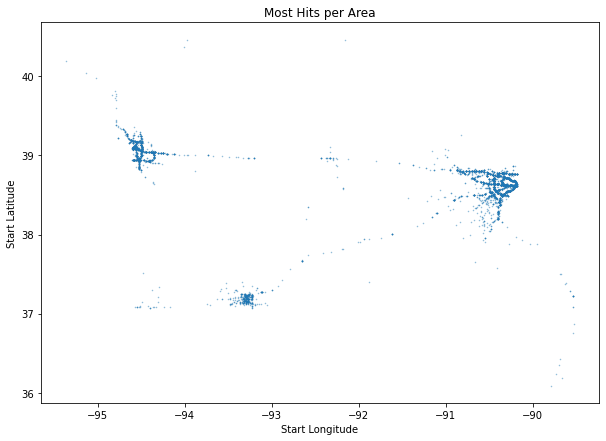

In [169]:
#plotting the Lat against Long could show the map of the Missouri area
plt.figure(figsize=(10,7))
plt.title('Most Hits per Area')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(dat.Start_Lng, dat.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

#### Accidents across different Counties

In [170]:
# Accidents per County
County = dat.County.value_counts()
print(County)

St. Louis County    1965
Jackson             1141
St. Louis City       563
St. Charles          449
Jefferson            351
Greene               344
Clay                 219
Platte                99
Franklin              54
Cass                  30
Boone                 29
Jasper                21
Saline                13
Phelps                12
Warren                11
Lafayette             11
Laclede               10
Scott                  9
Lincoln                7
Buchanan               7
Webster                6
St. Francois           6
Montgomery             6
Cape Girardeau         6
Ste Genevieve          5
Pulaski                4
Washington             4
Pemiscot               4
Christian              4
Lawrence               3
Miller                 3
Holt                   3
New Madrid             3
Callaway               3
Crawford               2
Cole                   2
Harrison               2
Saint Louis            1
Madison                1
Iron                   1


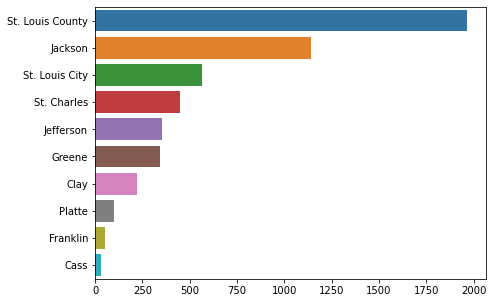

In [171]:
#As there are many Counties with less numeber of accidents considering only top 10 
County = County.head(10)
plt.figure(figsize=(7, 5))
sns.barplot(County.values, County.index)

#### Number of Accidents per each Weather Condition

In [172]:
# Matplotlib to visualize the data
import matplotlib.pyplot as plt

#Show plot in jupyter notebook
%matplotlib inline

In [173]:
# Value count of number of accidents per each weather condition
Weather = dat.Weather_Condition.value_counts()
len(Weather)

40

In [174]:
# Viewing the Weather data
Weather

Fair                            2343
Cloudy                           979
Mostly Cloudy                    669
Light Rain                       401
Partly Cloudy                    341
Light Snow                       131
Rain                              72
Light Rain with Thunder           66
Fog                               60
T-Storm                           38
Haze                              36
Cloudy / Windy                    30
Fair / Windy                      28
Heavy Rain                        28
Snow                              26
Heavy T-Storm                     23
Partly Cloudy / Windy             17
Light Drizzle                     17
Thunder                           16
Overcast                          15
Thunder in the Vicinity           14
Wintry Mix                        13
Mostly Cloudy / Windy             11
Light Snow / Windy                 8
Light Snow and Sleet               5
Heavy T-Storm / Windy              4
Heavy Snow                         4
L

In [175]:
#As there are many weather condition with less numeber of accidents considering only top 10 
Weather = Weather.head(10)
len(Weather)

10

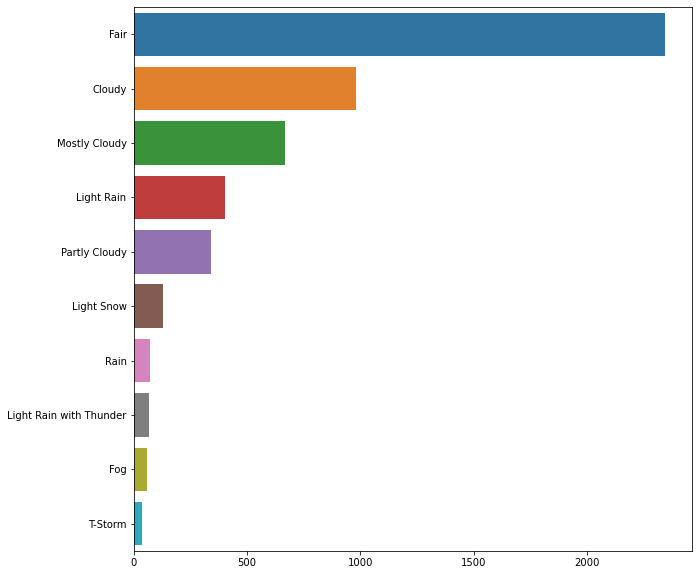

In [176]:
# Seaborn to visualize the data
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.barplot(Weather.values, Weather.index)

#### Number of Accidents per Temperature (F)

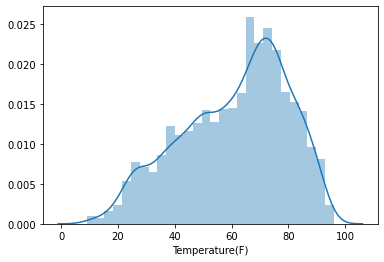

In [177]:
Temperature = dat['Temperature(F)'].value_counts()
#print(Temperature)
# Temperature Distribution Plot
sns.distplot(dat['Temperature(F)'])

### 3.3 Correlation Analysis

In [179]:
# Show correlation matrix
dat.corr(method='pearson')

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Turning_Loop,Start_Year,Start_Month,Start_Dayofweek,Start_Hour,Fog,Rain,Heavy_Rain,Light_Rain,Snow
TMC,1.000000,0.148184,0.088809,-0.068355,0.106864,-0.107048,-0.114864,0.008037,0.021904,0.014389,...,NaN,0.012549,0.136883,0.003207,-0.065004,-0.020614,0.006536,-0.024961,-0.021406,0.015835
Severity,0.148184,1.000000,0.293351,0.040960,0.163005,0.039483,0.027111,-0.143361,0.119924,-0.016899,...,NaN,-0.051636,0.028590,0.102399,0.238611,-0.048586,-0.009503,0.011830,0.014836,0.035053
Start_Lat,0.088809,0.293351,1.000000,-0.217750,0.013585,-0.043380,-0.048719,-0.113091,0.200981,-0.002144,...,NaN,-0.011739,0.131073,0.087097,0.119333,0.004466,-0.043506,0.007480,-0.038715,0.015077
Start_Lng,-0.068355,0.040960,-0.217750,1.000000,-0.035043,0.010668,0.014871,0.025914,0.619982,-0.067285,...,NaN,-0.080276,-0.033014,-0.036256,0.105016,-0.014620,0.022275,-0.027110,0.038420,-0.000139
Distance(mi),0.106864,0.163005,0.013585,-0.035043,1.000000,-0.024854,-0.027350,-0.009912,0.000188,0.028428,...,NaN,0.012235,0.039522,0.005054,0.005618,-0.017643,0.023577,-0.014489,-0.021236,0.007384
Temperature(F),-0.107048,0.039483,-0.043380,0.010668,-0.024854,1.000000,0.994523,-0.300530,-0.284212,0.277739,...,NaN,0.175085,-0.399539,-0.026420,0.256416,-0.049129,-0.014188,-0.001379,-0.013701,-0.125929
Wind_Chill(F),-0.114864,0.027111,-0.048719,0.014871,-0.027350,0.994523,1.000000,-0.283609,-0.289246,0.283741,...,NaN,0.188038,-0.409972,-0.024652,0.242233,-0.041889,-0.010494,0.001800,-0.006383,-0.139397
Humidity(%),0.008037,-0.143361,-0.113091,0.025914,-0.009912,-0.300530,-0.283609,1.000000,-0.012920,-0.462861,...,NaN,-0.065924,0.009191,-0.014803,-0.451510,0.139801,0.131463,0.086354,0.265617,0.067342
Pressure(in),0.021904,0.119924,0.200981,0.619982,0.000188,-0.284212,-0.289246,-0.012920,1.000000,-0.086359,...,NaN,-0.269177,0.123127,0.038006,0.018635,-0.020614,-0.033649,-0.035337,-0.035707,0.021898
Visibility(mi),0.014389,-0.016899,-0.002144,-0.067285,0.028428,0.277739,0.283741,-0.462861,-0.086359,1.000000,...,NaN,0.136431,0.003410,-0.025310,0.049215,-0.327129,-0.249094,-0.201279,-0.217598,-0.238442


Let's focus on the paire-wise correlation involving 'Severity'.

In [180]:
dat.corr(method='pearson')['Severity']

TMC                  0.148184
Severity             1.000000
Start_Lat            0.293351
Start_Lng            0.040960
Distance(mi)         0.163005
Temperature(F)       0.039483
Wind_Chill(F)        0.027111
Humidity(%)         -0.143361
Pressure(in)         0.119924
Visibility(mi)      -0.016899
Wind_Speed(mph)      0.087059
Precipitation(in)    0.012964
Amenity             -0.038285
Crossing            -0.017946
Give_Way            -0.044705
Junction             0.069011
No_Exit              0.013489
Railway             -0.039876
Station             -0.065357
Stop                -0.046847
Traffic_Calming      0.012610
Traffic_Signal      -0.177386
Turning_Loop              NaN
Start_Year          -0.051636
Start_Month          0.028590
Start_Dayofweek      0.102399
Start_Hour           0.238611
Fog                 -0.048586
Rain                -0.009503
Heavy_Rain           0.011830
Light_Rain           0.014836
Snow                 0.035053
Name: Severity, dtype: float64

From the correlation analysis, we find that the severity is positively associated with the extreme weather conditions like 'Heavy Rain',

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 <a list of 32 Text major ticklabel objects>)

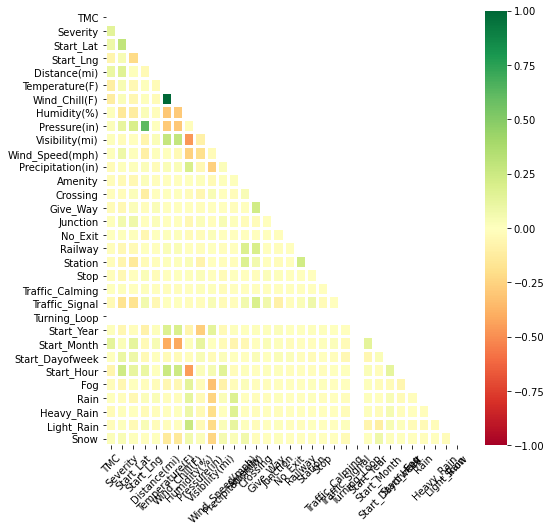

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Create a mask to display only the lower triangle of the matrix
mask = np.zeros_like(dat.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dat.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
# cmap is a colormap. For more information, refer to http://matplotlib.org/examples/color/colormaps_reference.html

plt.yticks(rotation=0)
plt.xticks(rotation=45)

### 3.4 Explore the Refined Dataset


#### Severity Analysis

In [69]:
dat.Severity.value_counts()

3    5252
2    2305
4     104
1       5
Name: Severity, dtype: int64

#### Severity of accidents by month

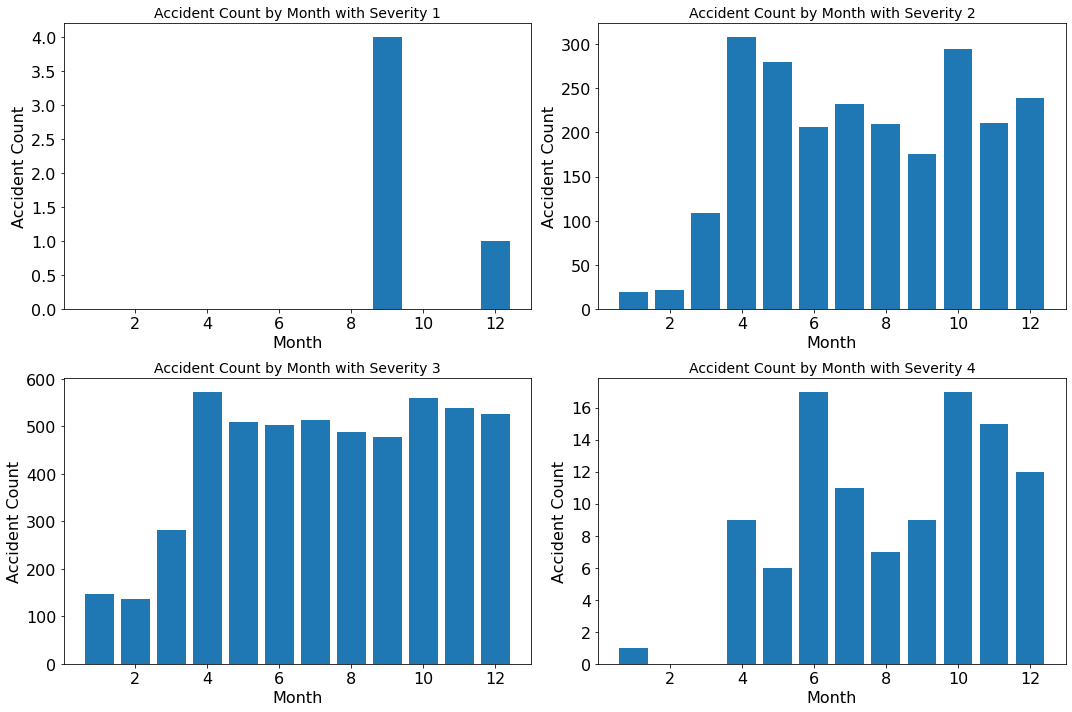

In [53]:
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(dat.loc[dat["Severity"] == s]['Start_Month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

For Severity 1: We observe that there are more accidents in the month of September (9) when compared to other months. Its the FALL season when there happen to be rainfalls.

For Severity 2: We observe that there are more accidents in the month of September (9) when compared to other months. Its the FALL season when there happen to be rainfalls.

For Severity 3: We observe that there are more accidents in the month of September (9) when compared to other months. Its the FALL season when there happen to be rainfalls.

For Severity 4: We observe that there are more accidents in the month of September (9) when compared to other months. Its the FALL season when there happen to be rainfalls.

Finally depending of entire data we can say that more number of sever accidents in fall and winter months. Thus, these seasons are more dangerous, it is interesting that January and February have much lower accident counts.

#### Severity of accidents by Day

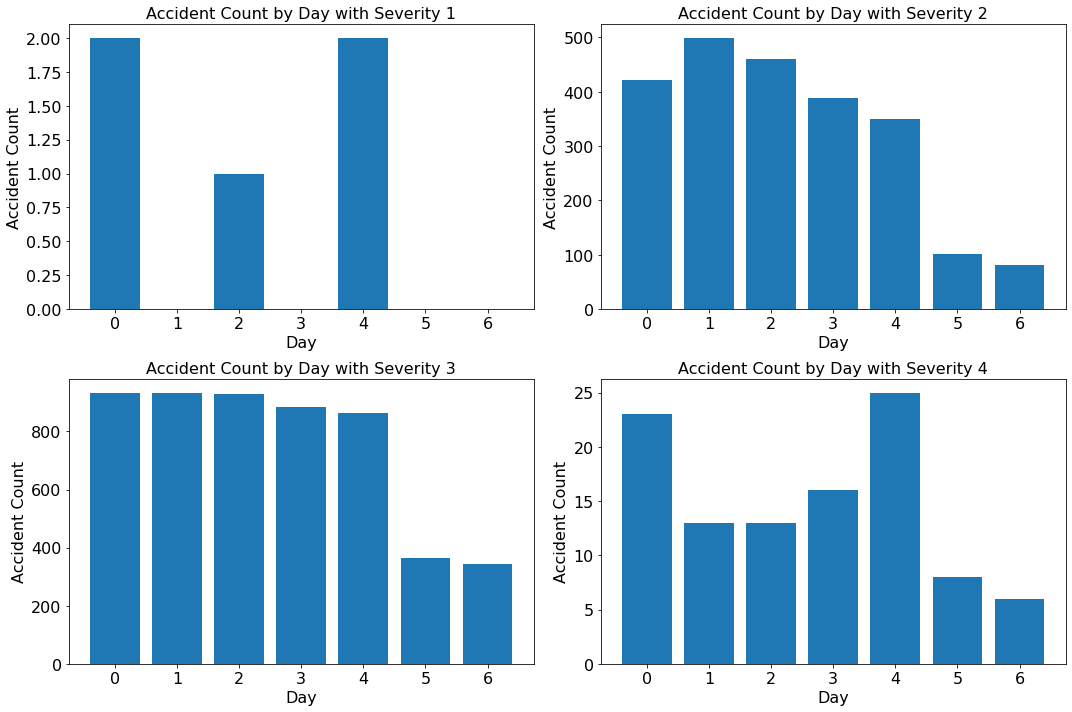

In [55]:
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(dat.loc[dat["Severity"] == s]['Start_Dayofweek'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

For all severity levels we can observe that there is a significant drop in the number of accidents during weekends.

#### Severity of accidents by Weather Conditions

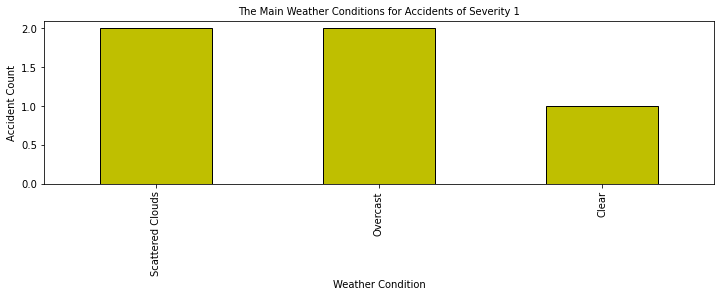

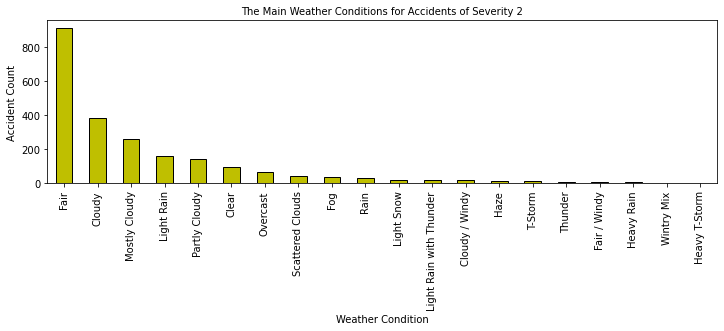

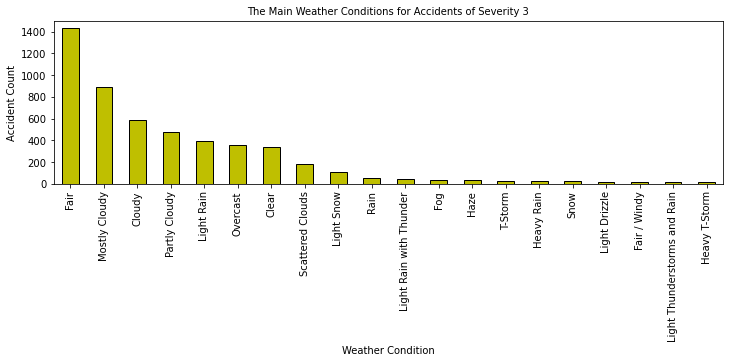

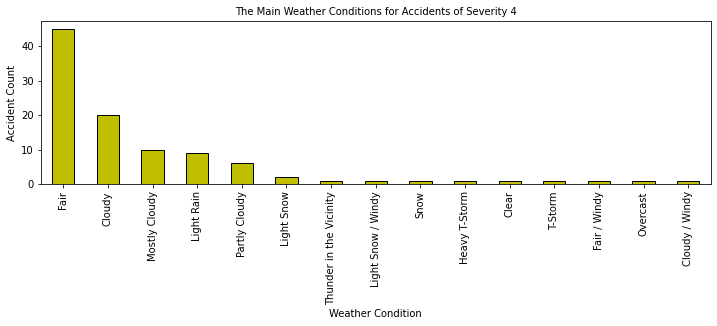

In [64]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,3))
    dat.loc[dat["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=10)
    plt.ylabel('Accident Count',fontsize=10)
    plt.title('The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

For severity level 1 accidents happen only under certain conditions like scattered clouds, overcast and clear.

Whereas for the remaining levels of severity (2,3,4), most accidents happen under fair, cloudy, Mostly cloudy or similar weather conditions. These conditions are considered good compared to rain and snow, Perhaps they are the most frequent conditions. Light rain and light snow are the top adverse weather conditions. Most likely these cause accidents since they can make roads slippery without causing concern in the drivers.

Lets see the severity of accidents under conditions like fog, light rain, heavy rain and snow

#### Severity of accidents by Fog, Light Rain, Heavy Rain and Snow

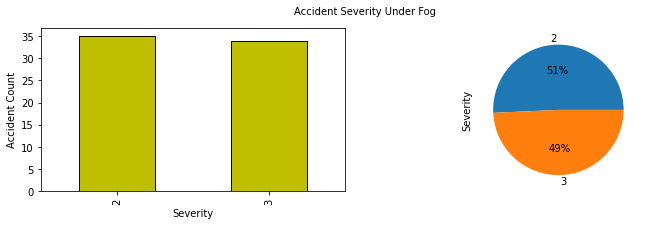

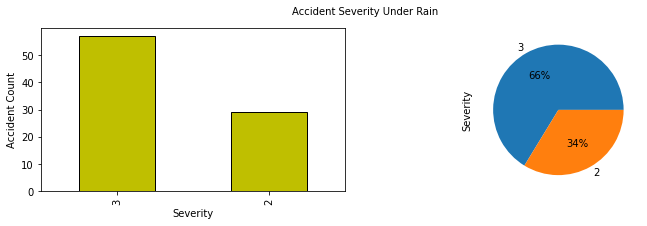

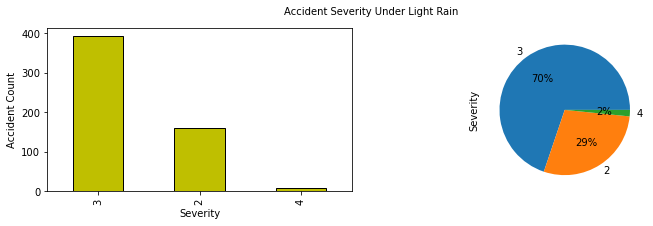

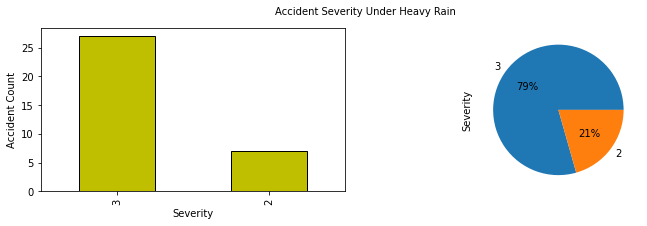

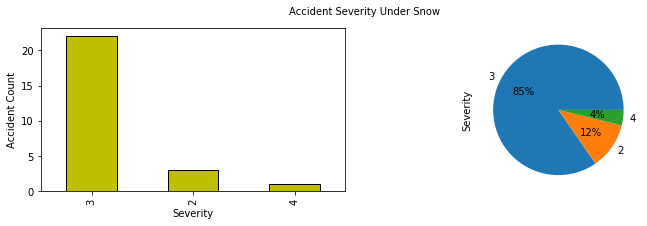

In [67]:
for s in ["Fog","Rain","Light Rain","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,3))
    plt.suptitle('Accident Severity Under ' + s,fontsize=10)
    plt.subplot(1,2,1)
    dat.loc[dat["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=10)
    plt.ylabel('Accident Count',fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(1,2,2)
    dat.loc[dat["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10)

The proportion of level 3 accidents increases as weather changes from fog (49%) to rain (66%) to light rain (70%)  to heavy rain (79%) to snow (85%).

Whereas we have level 4 accidents under two weather conditions, which are light rain(2%) to snow(4%).

#### Severity of accidents by Infrasturcture like Amenity, Crossing, Give_Way, Junction, No_Exit, Railway, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop

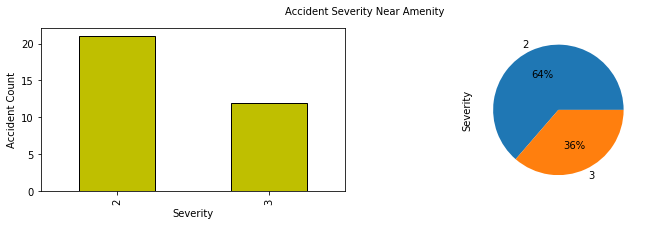

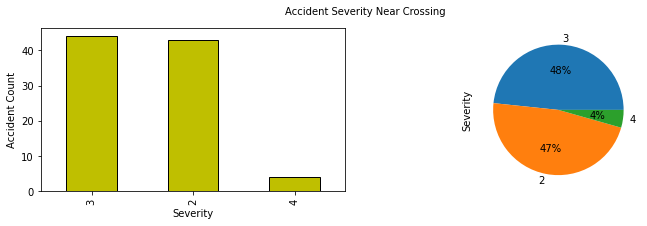

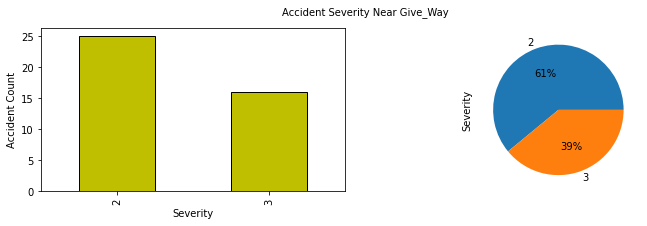

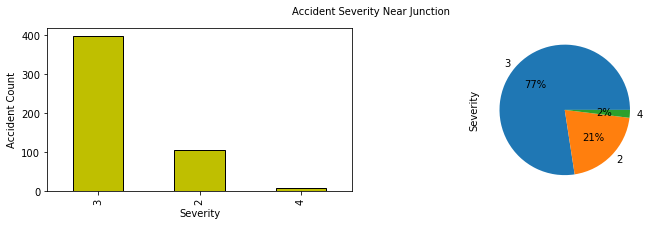

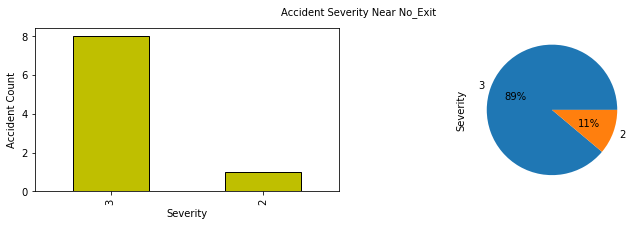

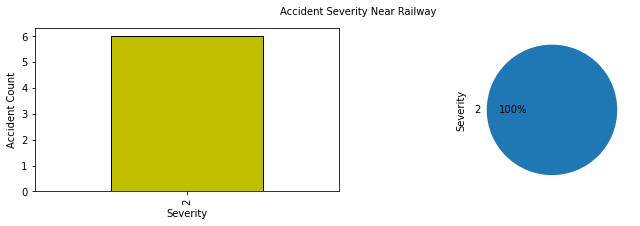

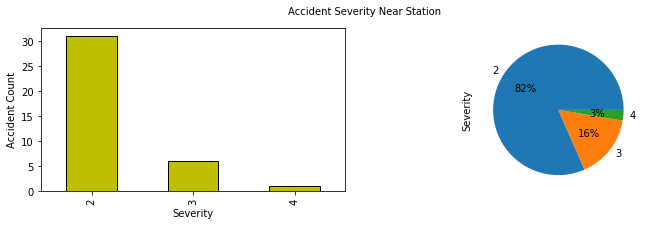

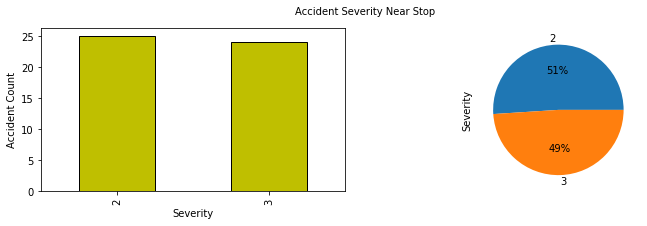

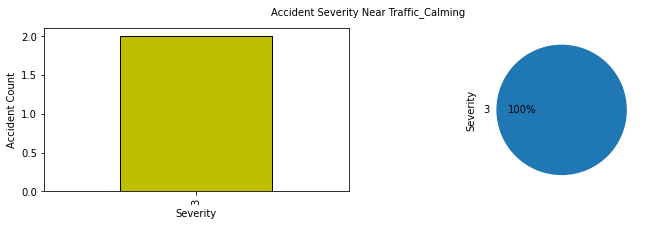

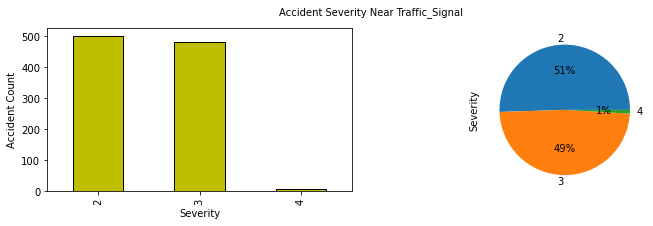

In [72]:
for s in ['Amenity', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (dat[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,3))
        plt.xticks(fontsize=10)
        plt.suptitle('Accident Severity Near ' + s,fontsize=10)
        plt.subplot(1,2,1)
        dat.loc[dat[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=10)
        plt.ylabel('Accident Count',fontsize=10)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.subplot(1,2,2)
        dat.loc[dat[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10)

Junctions and no exit have the highest proportion of level 3. Whereas creossing, junction, station and traffic signal level 4 severity accidents are taking place.

In [ ]:
severityResult = dat.groupby('Severity').count()
severityResult

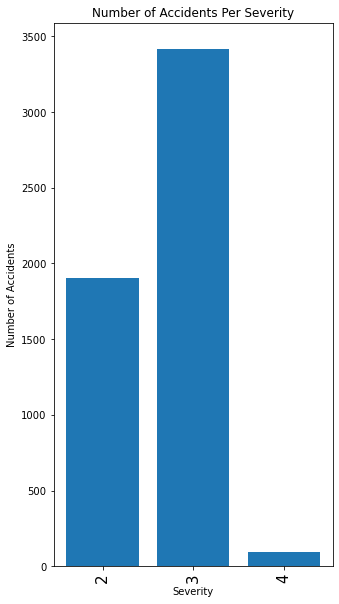

In [23]:
plt.figure(figsize=(5, 10))
plt.title('Number of Accidents Per Severity')
plt.bar(severityResult.index, severityResult.ID)
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(severityResult.index, rotation='vertical', size=15)
plt.show()

In [24]:
visibilityResult = dat.groupby('Visibility(mi)').count()
visibilityResult

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Year,Start_Month,Start_Dayofweek,Start_Hour
Visibility(mi),,,,,,,,,,,,,,,,,,,,,
0.00,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.25,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
0.50,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
0.75,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
0.80,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1.00,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
1.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.50,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


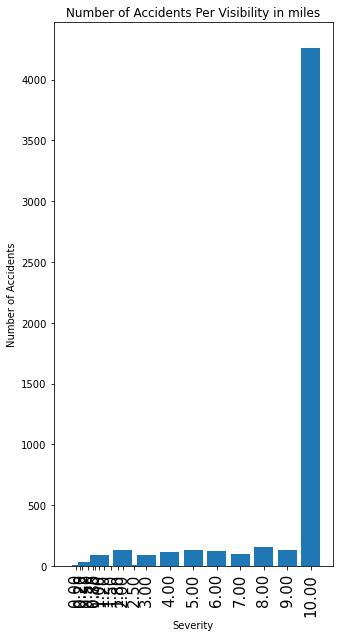

In [25]:
plt.figure(figsize=(5, 10))
plt.title('Number of Accidents Per Visibility in miles')
plt.bar(visibilityResult.index, visibilityResult.ID)
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(visibilityResult.index, rotation='vertical', size=15)
plt.show()

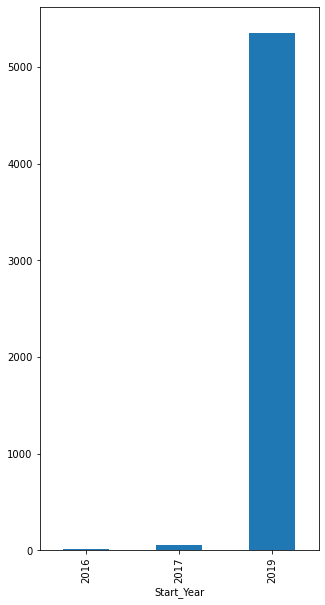

In [26]:
plt.figure(figsize =(5,10))
dat.groupby(['Start_Year']).size().plot.bar()

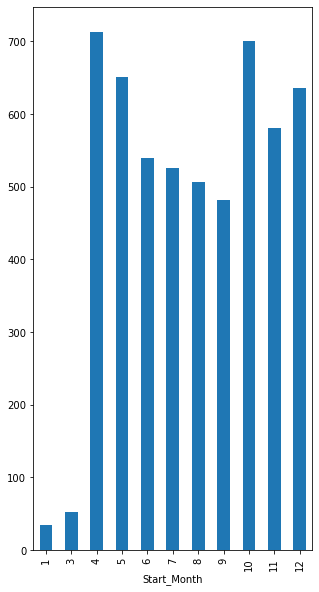

In [27]:
plt.figure(figsize =(5,10))
dat.groupby(['Start_Month']).size().plot.bar()

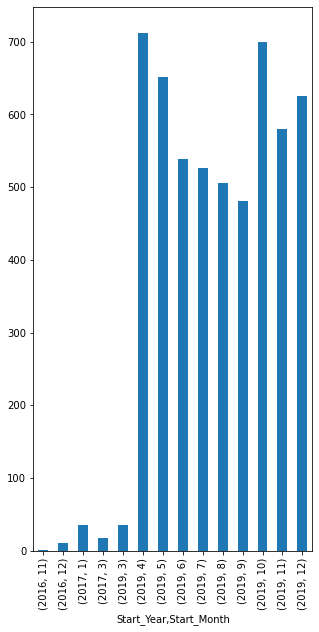

In [28]:
plt.figure(figsize =(5,10))
dat.groupby(['Start_Year','Start_Month']).size().plot.bar()

In [29]:
dat.groupby(['Start_Dayofweek']).size()

Start_Dayofweek
0     988
1    1017
2     933
3     866
4     877
5     377
6     362
dtype: int64

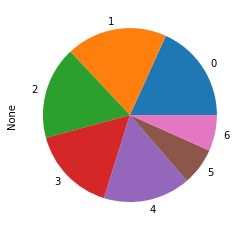

In [30]:
dat.groupby(['Start_Dayofweek']).size().plot.pie()

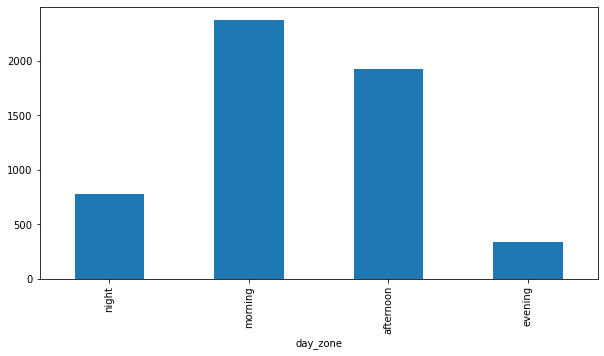

In [31]:
dat['day_zone'] = pd.cut((dat['Start_Hour']),bins=(0,6,12,18,24), labels=["night", "morning", "afternoon", "evening"])
plt.figure(figsize =(10,5))
dat.groupby(['day_zone']).size().plot.bar()

St. Louis County    1965
Jackson             1141
St. Louis City       563
St. Charles          449
Jefferson            351
Greene               344
Clay                 219
Platte                99
Franklin              54
Cass                  30
Boone                 29
Jasper                21
Saline                13
Phelps                12
Warren                11
Lafayette             11
Laclede               10
Scott                  9
Buchanan               7
Lincoln                7
Montgomery             6
Cape Girardeau         6
St. Francois           6
Webster                6
Ste Genevieve          5
Washington             4
Christian              4
Pulaski                4
Pemiscot               4
Miller                 3
Lawrence               3
New Madrid             3
Holt                   3
Callaway               3
Crawford               2
Harrison               2
Cole                   2
Iron                   1
Madison                1
Gasconade              1


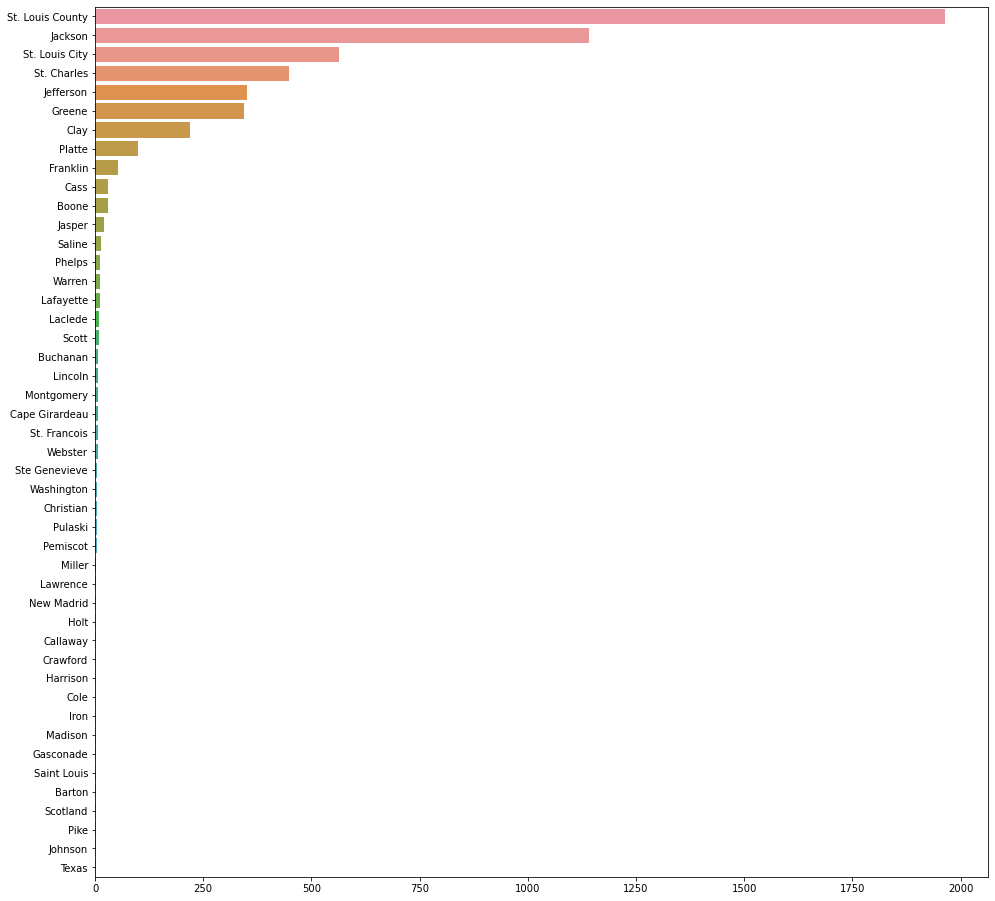

In [32]:
# Accidents per County
County = dat.County.value_counts()
print(County)
plt.figure(figsize=(16, 16))
sns.barplot(County.values, County.index)

S           595
CALM        556
N           418
SSW         382
W           346
SSE         342
E           299
SW          283
WSW         267
NW          266
NNW         257
WNW         256
SE          230
ESE         207
NNE         177
ENE         176
NE          175
VAR         145
North        30
East          9
Variable      2
South         2
Name: Wind_Direction, dtype: int64


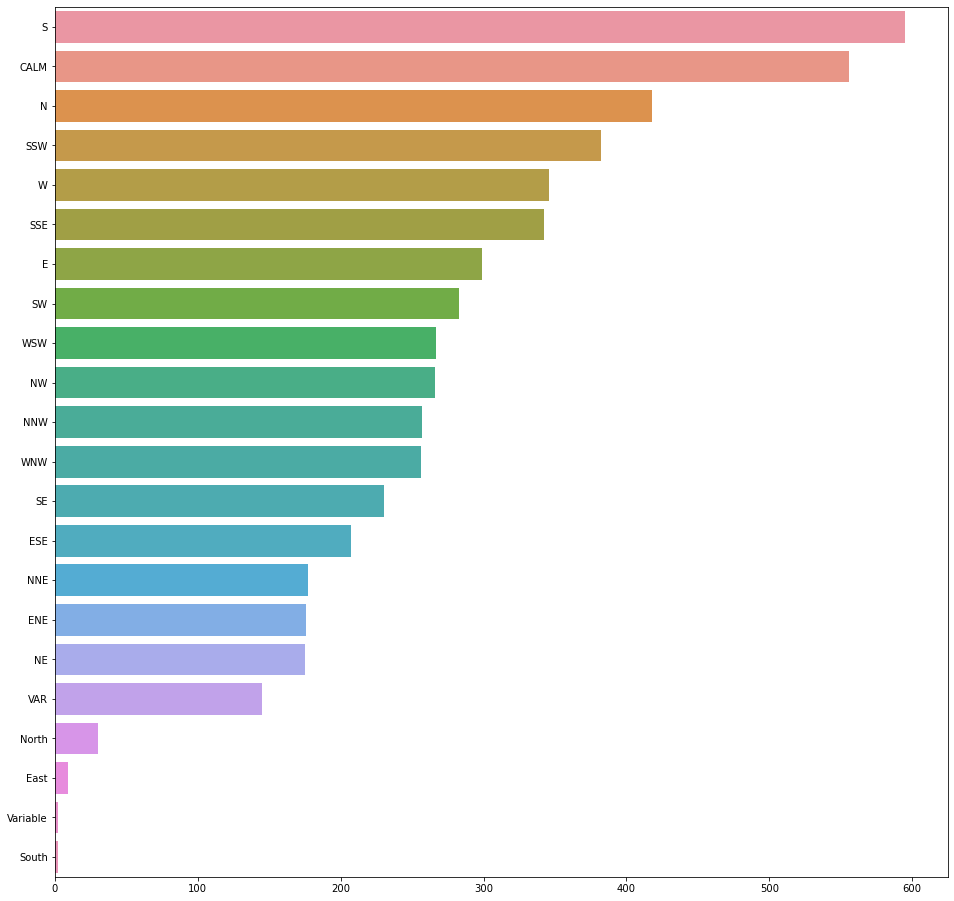

In [33]:
# Accidents per Wind_Direction
Wind_Direction = dat.Wind_Direction.value_counts()
print(Wind_Direction)
plt.figure(figsize=(16, 16))
sns.barplot(Wind_Direction.values, Wind_Direction.index)

72.0    147
70.0    137
73.0    135
76.0    134
74.0    131
       ... 
19.4      1
44.1      1
19.9      1
14.0      1
37.9      1
Name: Temperature(F), Length: 101, dtype: int64


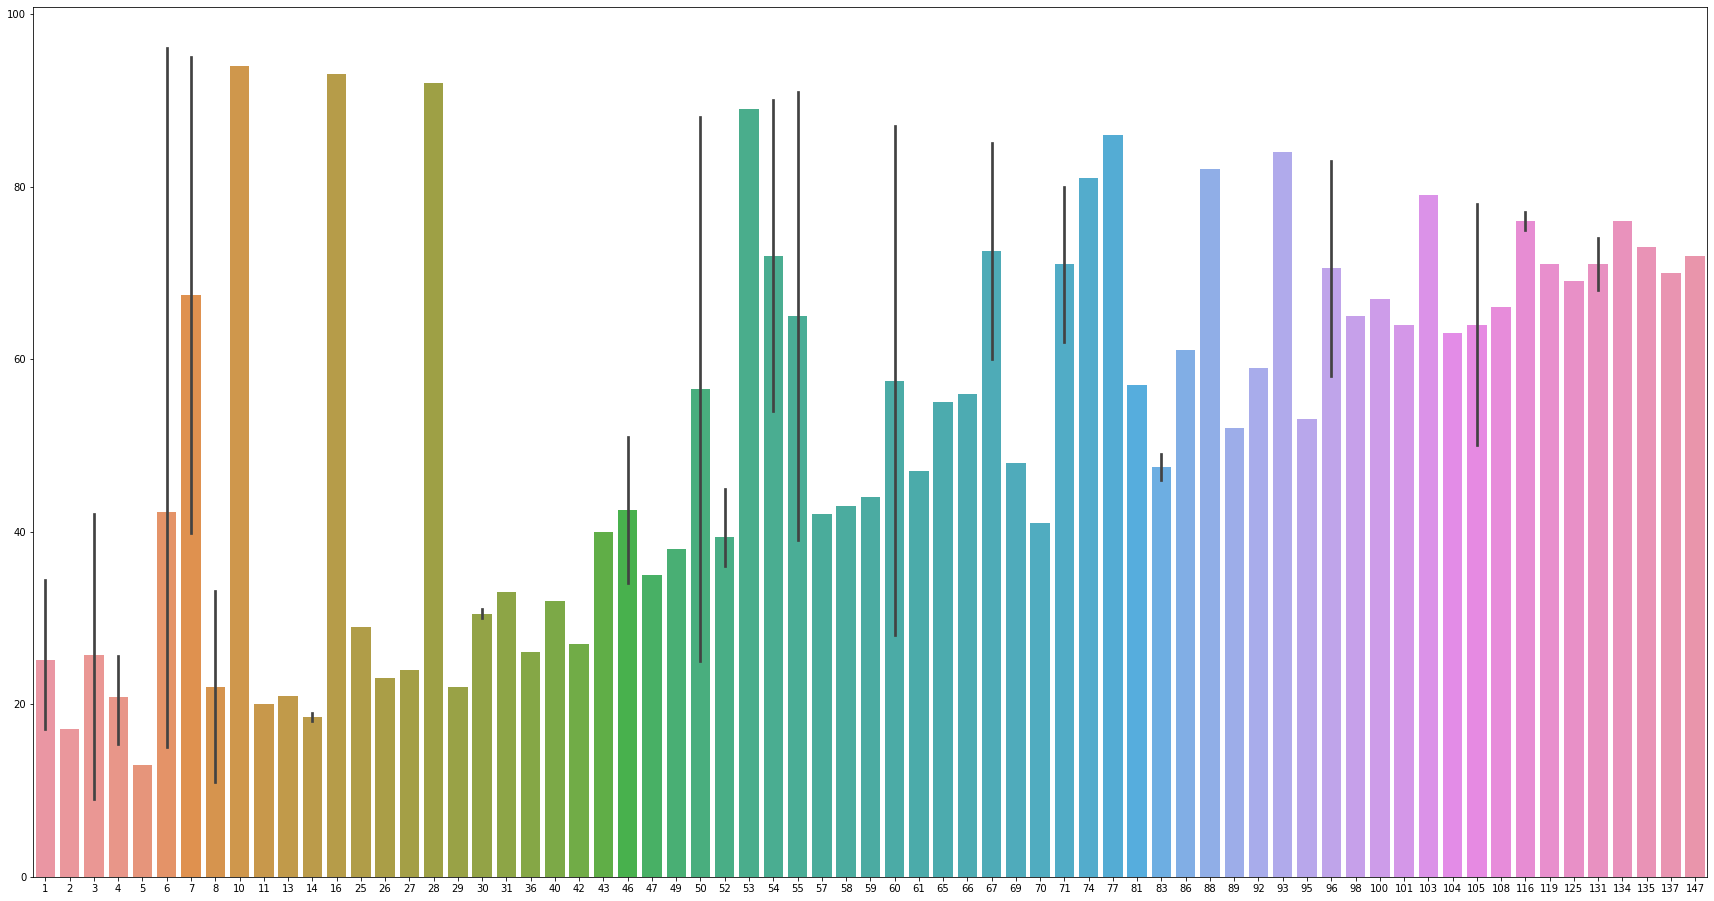

In [34]:
# Accidents per Temperature in F
Temperature = dat['Temperature(F)'].value_counts()
print(Temperature)
plt.figure(figsize=(30, 16))
sns.barplot(Temperature.values, Temperature.index)

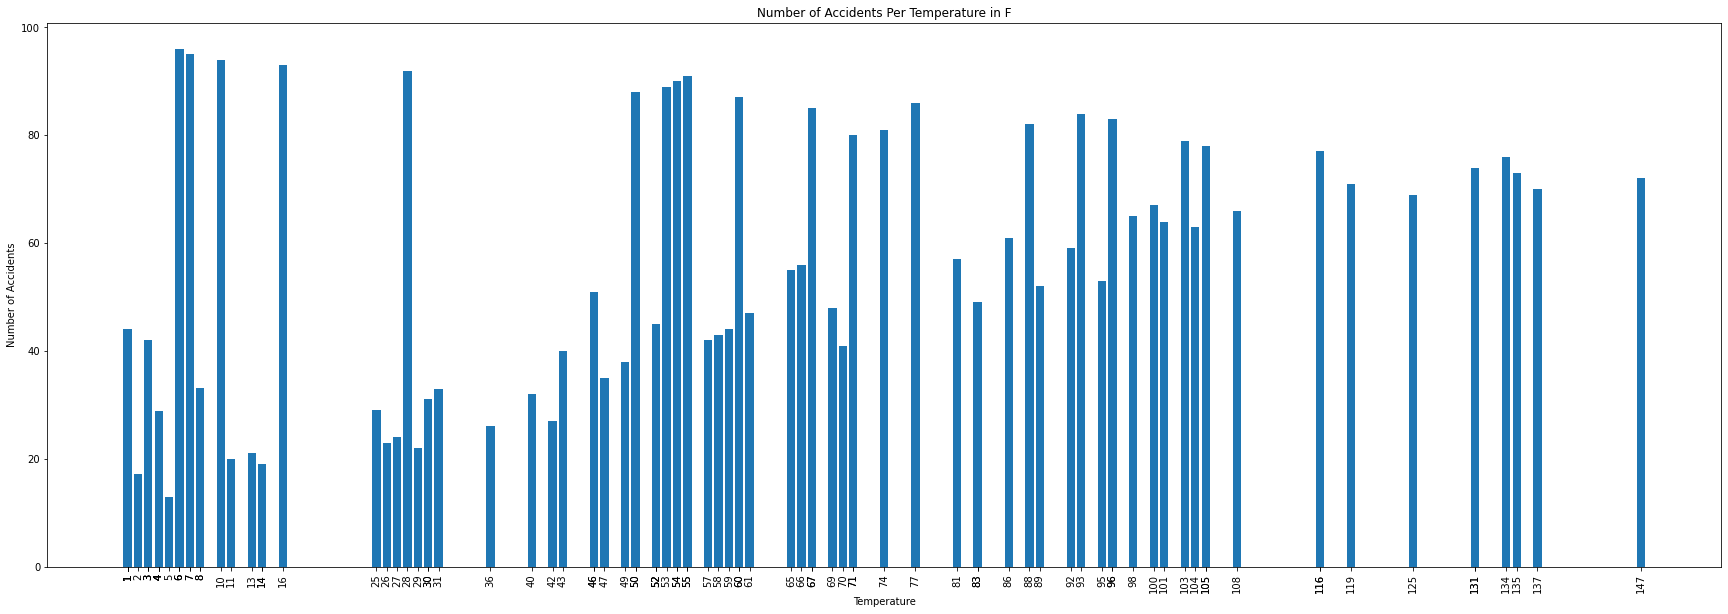

In [35]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents Per Temperature in F')
plt.bar(Temperature.values, Temperature.index)
plt.xlabel('Temperature')
plt.ylabel('Number of Accidents')
plt.xticks(Temperature.values, rotation='vertical')
plt.show()

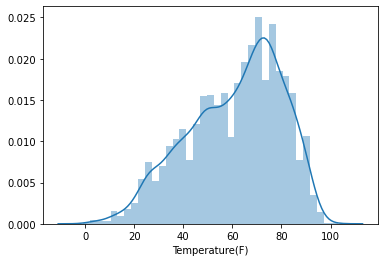

In [39]:
import seaborn as sb
sb.distplot(dat['Temperature(F)'])

## 4. Summary